# Plot Data Previews

In [6]:
%reload_ext autoreload
%autoreload 2

import os
from os.path import join
from pathlib import Path
from glob import glob
import json
from pprint import pprint

#import plotly.plotly as py
import plotly.offline as py
import plotly.graph_objs as go
from plotly import tools

import matplotlib.ticker as ticker
import matplotlib.cm as cm
import matplotlib as mpl
from matplotlib.gridspec import GridSpec

import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
from PIL import Image, ImageDraw
%matplotlib inline
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm

In [16]:
# Load files
fp_origins = '/data_store/datasets/msc/summaries/megapixels_origins.csv'
fp_origins_top = '/data_store/datasets/msc/summaries/megapixels_origins_top.csv'
fp_overview = '/data_store/datasets/msc/summaries/megapixels_overview.csv'
fp_sector = '/data_store/datasets/msc/summaries/summary_sector.csv'
fp_country = '/data_store/datasets/msc/summaries/summary_countries.csv'
fp_country_top = '/data_store/datasets/msc/summaries/summary_countries_top.csv'
fp_dir_out = '/data_store/datasets/msc/viz/'

In [17]:
df_origins = pd.read_csv(fp_origins).fillna(0)
df_overview = pd.read_csv(fp_overview).fillna('')
df_country = pd.read_csv(fp_country).fillna('').set_index('country')
df_sector = pd.read_csv(fp_sector).fillna('')

In [18]:
df_origins_plt = df_origins.drop(['images', 'videos', 'key', 'name_full'], axis=1)

In [19]:
# create custom color maps
import matplotlib as mpl
import matplotlib.cm as mplcm
import matplotlib.pyplot as plt
from matplotlib import cm

def get_color_map(cmap='prism', ncolors=20, as_hex=False, reverse=False, bgr=True):
  norm  = mpl.colors.Normalize(vmin=0, vmax=ncolors-1)
  scalars = mplcm.ScalarMappable(norm=norm, cmap=cmap)
  colors = [scalars.to_rgba(i) for i in range(ncolors)]
  colors = [(int(255*c[0]),int(255*c[1]),int(255*c[2])) for c in colors]  
  if reverse:
    colors = colors[::-1]
  if bgr:
    colors = [c[::-1] for c in colors]
  if as_hex:
    colors = ['#{:02x}{:02x}{:02x}'.format(c[0],c[1],c[2]) for c in colors]
  return colors

In [20]:
sums = {}
for k in df_origins_plt.keys():
  if not ('cooperative' in k.lower() or 'studio' in k.lower()):
    sums[k] = int(df_origins_plt[k].sum())

In [21]:
df_sums = pd.DataFrame({'images':list(sums.values())}, index=sums.keys())

# get top N
ntop = 4
k = 'images'
df_top = df_sums.nlargest(ntop, k)
df_bot = df_sums.nsmallest(len(df_sums) - ntop, k)
df_tmp = pd.DataFrame.from_dict({'tmp': ['Other Sources Combined'], k: df_bot[k].sum()}).set_index('tmp')
df_sums = df_top.append(df_tmp)

df_sums.head(10)

images
Search Engines          15063600
Flickr.com               5891944
IMDb.com                 2625705
CCTV                      463507
Other Sources Combined    176245

In [22]:
colors = get_color_map(ncolors=5, bgr=False, as_hex=True)
print(colors)
color_list = list(dir(mplcm))
print(color_list[:10])
colors_msc = ['#6d9438', '#d2dcbe', '#a7bb7e', '#aaaaaa','#999999', '#bbbbbb']

['#ff0000', '#0056c3', '#ffd700', '#a200ce', '#54fe00']
['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r']


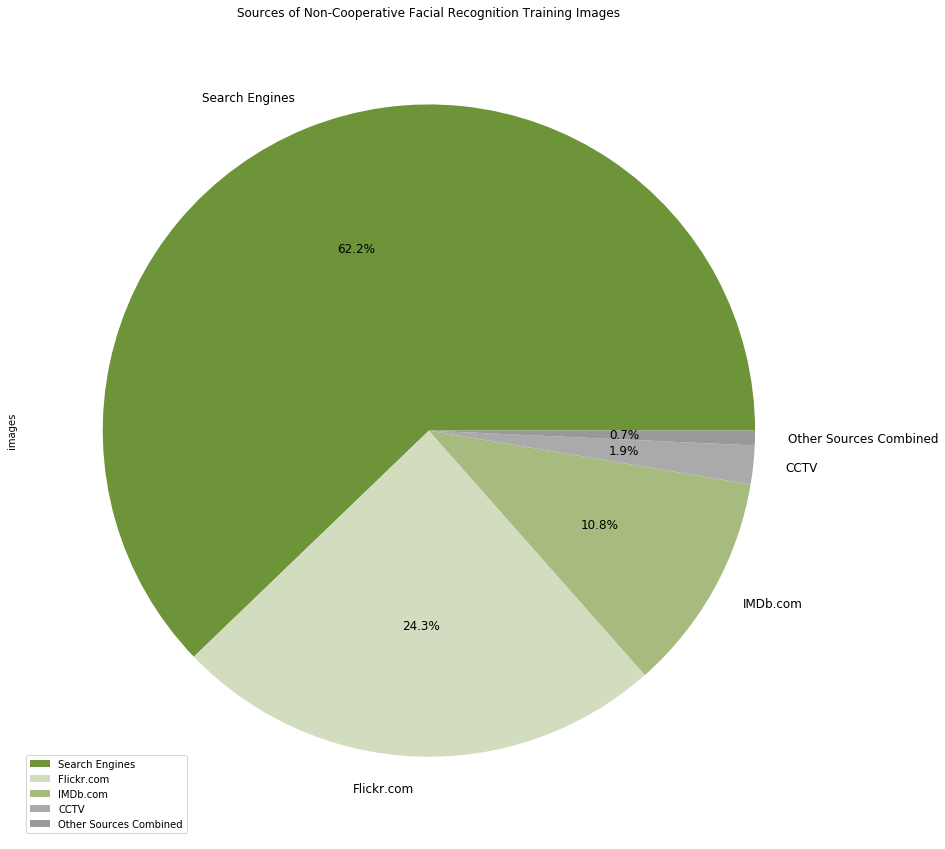

In [23]:
labels = ['IMDb.com', 'WikiMedia.com', 'Flickr.com', 'Search Engines', 'Livecams', 'CCTV', 'YouTube.com']
colors = get_color_map(cmap='Accent_r',ncolors=ntop+4, as_hex=True, bgr=False, reverse=False)
plot = df_sums.plot.pie(y='images',figsize=(15,15),
  title='Sources of Non-Cooperative Facial Recognition Training Images', colors=colors_msc,
                        autopct='%0.1f%%', fontsize=12, labeldistance=1.1)

In [24]:
# Save PDF
fig = plot.get_figure()
fig.savefig(join(fp_dir_out,'summary_sources.pdf'))
fig.savefig(join(fp_dir_out,'summary_sources.png'))

# Save CSV
df_sums.to_csv(fp_origins_top, index=True)

## Plot Country

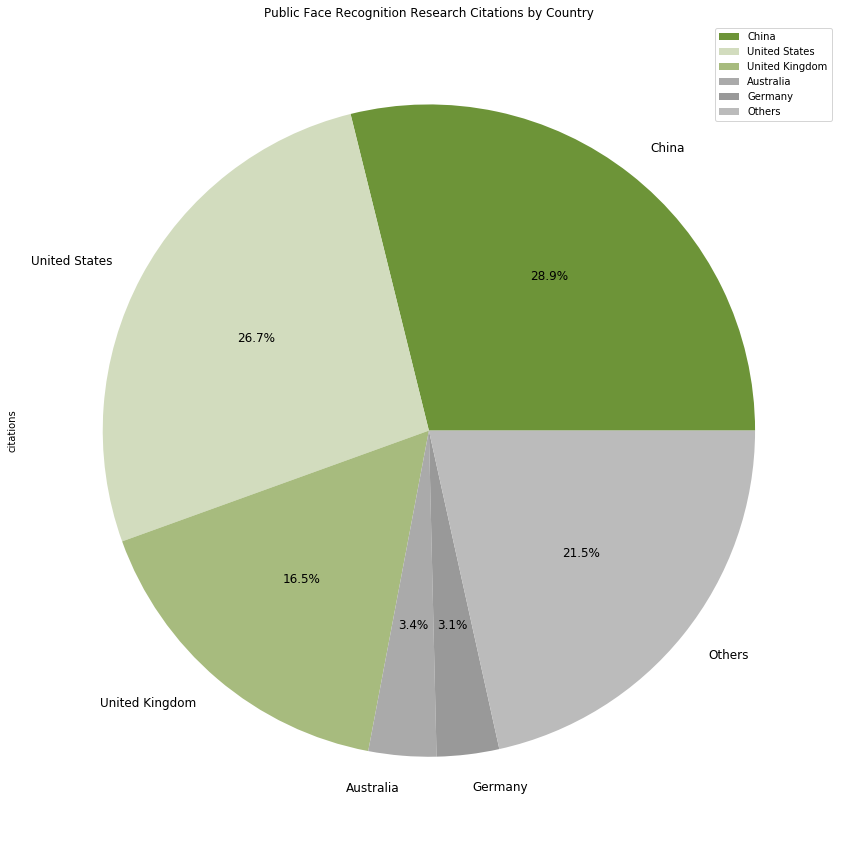

In [25]:
ntop = 5
df_top = df_country.nlargest(ntop, 'citations')
df_bot = df_country.nsmallest(len(df_country) - ntop, 'citations')
df_tmp = pd.DataFrame.from_dict({'country': ['Others'], 'citations': df_bot['citations'].sum()}).set_index('country')
df_top = df_top.append(df_tmp)
plot = df_top.plot.pie(y='citations', figsize=(15,15), autopct='%0.1f%%', colors=colors_msc,
                       fontsize=12, title='Public Face Recognition Research Citations by Country')

In [28]:
# Save images
fig = plot.get_figure()
fig.savefig(join(fp_dir_out,'summary_countries.pdf'))
fig.savefig(join(fp_dir_out,'summary_countries.png'))

# save CSV
df_top.to_csv(fp_country_top)

## Testing

In [83]:
df_pies = pd.read_csv('toy_data_pies.csv')
df_pies.head()

ParticipantLine                           Source EatingOccasion  AtHome  \
0     73570.015.0                            Store         Dinner    True   
1     73598.015.0  Restaurant with Waiter-Waitress         Dinner   False   
2      73633.08.0                            Store          Lunch   False   
3     73653.018.0         From Somewhere Else-Gift          Snack    True   
4     73726.017.0                        Bake Sale          Snack    True   

   Calories                       FoodCode  
0       428  lemon (not cream or meringue)  
1       726                        pumpkin  
2       309                        pumpkin  
3       123  lemon (not cream or meringue)  
4        17                      blueberry

In [84]:
df_pie_sources = df_pies.groupby('Source').agg('count')
df_pie_flavors = df_pies.groupby('FoodCode').agg('count')

In [85]:
df_pie_flavors.head()

ParticipantLine  Source  EatingOccasion  \
FoodCode                                                                 
blueberry                                    1       1               1   
lemon (not cream or meringue)                2       2               2   
pumpkin                                      2       2               2   

                               AtHome  Calories  
FoodCode                                         
blueberry                           1         1  
lemon (not cream or meringue)       2         2  
pumpkin                             2         2

In [89]:
source_labels = df_pie_sources.FoodCode.sort_values().index
source_counts = df_pie_sources.FoodCode.sort_values()

flavor_labels = df_pie_flavors.Source.sort_values().index
flavor_counts = df_pie_flavors.Source.sort_values()

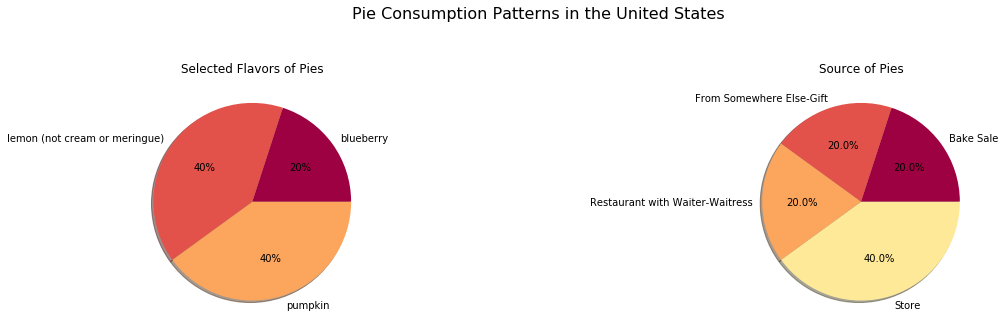

In [97]:
# Make square figures and axes
plt.figure(1, figsize=(20,10))
the_grid = GridSpec(2, 2)


cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]


plt.subplot(the_grid[0, 1], aspect=1, title='Source of Pies')

source_pie = plt.pie(source_counts, labels=source_labels, autopct='%1.1f%%', shadow=True, colors=colors)


plt.subplot(the_grid[0, 0], aspect=1, title='Selected Flavors of Pies')

flavor_pie = plt.pie(flavor_counts,labels=flavor_labels, autopct='%.0f%%', shadow=True, colors=colors)

plt.suptitle('Pie Consumption Patterns in the United States', fontsize=16)


plt.show()

In [100]:
#importing critical items
from IPython.core.display import HTML, SVG
import pandas as pd
import numpy as np
#import xport 
import IPython 
from ipywidgets import Layout
from ipywidgets import widgets
from IPython.display import display


In [101]:
sources_pie = go.Pie(labels=source_counts.index, values=source_counts, marker=dict(colors=colors
                                                            , line=dict(color='#FFF', width=2)), 
                                                            domain={'x': [0.0, .4], 'y': [0.0, 1]}
                                                            , showlegend=False, name='Sources of Pie', textinfo='label+percent')

flavor_pie = go.Pie(labels=flavor_counts.index, values=flavor_counts, marker=dict(colors=colors
                                                            , line=dict(color='#FFF', width=2)), 
                                                            domain={'x': [.6, 1], 'y': [0.0, 1]}
                                                            , showlegend=False, name='Flavors of Pie', textinfo='label+percent')

layout = go.Layout(height = 600,
                   width = 1000,
                   autosize = False,
                   title = 'Pie Consumption Patterns in the United States')
fig = go.Figure(data = [sources_pie,flavor_pie ], layout = layout)


py.iplot(fig, filename='basic_pie_chart')

#https://stackoverflow.com/questions/39629735/how-to-plot-pie-charts-as-subplots-with-custom-size-with-plotly-in-python
